In [131]:
# Classification of turkish money bills
# 6 classes
# train & validation set available


In [1]:
import torch 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)


In [2]:
import time
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np


In [67]:
# label-data
train_label_file = 'train.csv'
val_label_file ='val.csv'

n1, n2 = len(pd.read_csv(train_label_file)), 
len(pd.read_csv(val_label_file))
print(n1, 'datapoints available in trainset\n', 
      n2, 'datapoints available in valset')


5550 datapoints available in trainset
 450 datapoints available in valset


In [75]:
# I'll use this class to create the datasets

class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len = self.data_name.shape[0] 
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        img_name = self.data_dir + self.data_name.iloc[idx, 2]
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        return image, y
    

In [76]:
# Compose the images: create the 'compose' object

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
compose = transforms.Compose([transforms.Resize((224, 224))
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])


In [83]:
# train & val datasets

train_ds = Dataset(transform=compose, 
                   csv_file=train_label_file, 
                   data_dir='data/')
val_ds = Dataset(transform=compose, 
                   csv_file=val_label_file, 
                   data_dir='data/')


In [84]:
# get the pre-trained model
model = models.resnet18(pretrained=True)

for p in model.parameters():
    p.requires_grad = False
    
# classification with 6 classes
model.fc = nn.Linear(512, 6)

print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [126]:
# train the model
train_loader = DataLoader(dataset=train_ds, batch_size=50, shuffle=True)
val_loader = DataLoader(dataset=val_ds, batch_size=45, shuffle=True)

optimizer = torch.optim.Adam([p for p in model.parameters() if p.requires_grad], lr=0.003)
ce_loss = nn.CrossEntropyLoss()

n_epochs = 10
loss_list = []
accuracy_list = []
correct_count = 0

for e in range(n_epochs):
    print(e)
    
    loss_sublist = []
    
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        z = model(x)
        
        loss = ce_loss(z, y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
        
    loss_list.append(np.mean(loss_sublist))
    
    for x_val, y_val in val_loader:
        
        model.eval()
        z = model(x_val)
        _, yhat = torch.max(z.data, 1)
        
        correct_count += (yhat == y_val).sum().item()
    
    accuracy = correct_count / len(val_ds)
    accuracy_list.append(accuracy)
    correct_count = 0
        

0
1
2
3
4
5
6
7
8
9


Text(0.5, 1.0, 'Loss')

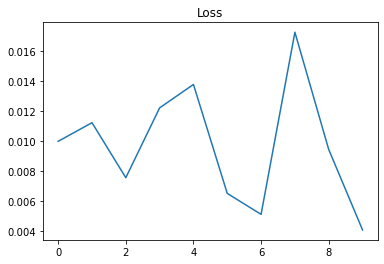

In [127]:
# plot loss

plt.plot(loss_list)
plt.title('Loss')


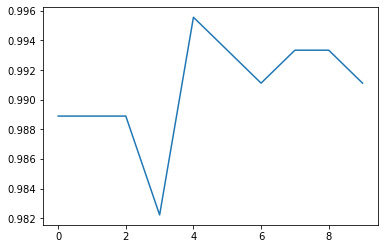

In [128]:
# Type your code here
plt.plot(accuracy_list)

saltAndPeppered_10_1_0030.png


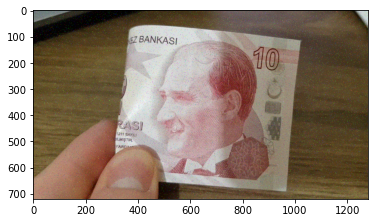

tensor([1])
tensor([1]) tensor([1])
Correctly classified.
20_2_0081.png


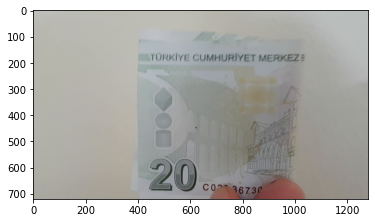

tensor([2])
tensor([2]) tensor([2])
Correctly classified.
eplus_50_1_0118.png


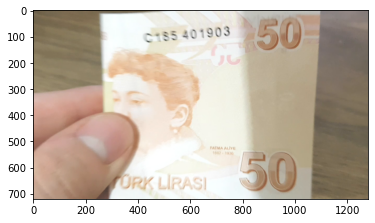

tensor([3])
tensor([3]) tensor([3])
Correctly classified.
eplus_10_1_0060.png


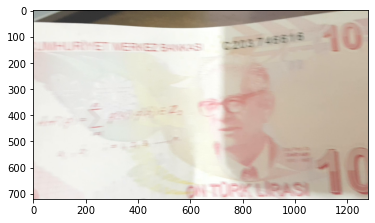

tensor([1])
tensor([1]) tensor([1])
Correctly classified.
eminus_5_2_0003.png


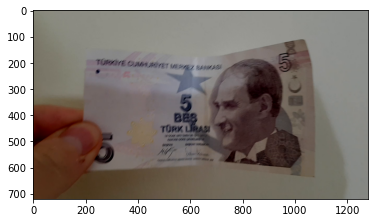

tensor([0])
tensor([0]) tensor([0])
Correctly classified.


In [130]:
# Plot the images with labels

look_up = {0: 'predicted: $5'
           , 1: 'predicted: $10'
           , 2: 'predicted: $20'
           , 3: 'predicted: $50'
           , 4: 'predicted: $100'
           , 5: 'predicted $200'}
random.seed(45)
numbers = random.sample(range(450), 5)

# Type your code here

def plot_random_image(i):
    data_dir = val_ds.data_dir
    data_name = val_ds.data_name.iloc[i]['filename']
    print(data_name)
    img = Image.open(data_dir + data_name)
    plt.imshow(img)
    plt.show()
    
    subset = torch.utils.data.Subset(val_ds, [i])
    dl = DataLoader(subset, batch_size=1)
    for x, y in dl:
        model.eval()
        z = model(x)
        _, yhat = torch.max(z.data, 1)
    
        break
    
    print(yhat)
    if(yhat == y):
        print(y, yhat)
        print('Correctly classified.')
    else:
        print(y, yhat)
        print('Mis-classified.')
        
for i in numbers:
    plot_random_image(i)


In [ ]:
#torch.save(model, "resnet18_pytorch.pt")